In [226]:
library(readxl)
library(ggplot2)
library(caret)
library(reshape2)

options(repr.plot.width=12, repr.plot.height=6) # plots size

ERROR: Error in library(catboost): there is no package called 'catboost'


In [75]:
churn <- read_excel("data/Churn.xls")
head(churn)

Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
118,0,223.4,220.6,203.9,6.3,0,0,1,0,...,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027


In [76]:
# check column names
names(churn)

[1] "Account Length" "VMail Message"  "Day Mins"       "Eve Mins"      
 [5] "Night Mins"     "Intl Mins"      "CustServ Calls" "Churn"         
 [9] "Int'l Plan"     "VMail Plan"     "Day Calls"      "Day Charge"    
[13] "Eve Calls"      "Eve Charge"     "Night Calls"    "Night Charge"  
[17] "Intl Calls"     "Intl Charge"    "State"          "Area Code"     
[21] "Phone"

In [77]:
# transform column names
names(churn) <- make.names(names(churn))

In [78]:
names(churn)

[1] "Account.Length" "VMail.Message"  "Day.Mins"       "Eve.Mins"      
 [5] "Night.Mins"     "Intl.Mins"      "CustServ.Calls" "Churn"         
 [9] "Int.l.Plan"     "VMail.Plan"     "Day.Calls"      "Day.Charge"    
[13] "Eve.Calls"      "Eve.Charge"     "Night.Calls"    "Night.Charge"  
[17] "Intl.Calls"     "Intl.Charge"    "State"          "Area.Code"     
[21] "Phone"

In [79]:
str(churn)

Classes 'tbl_df', 'tbl' and 'data.frame':	3333 obs. of  21 variables:
 $ Account.Length: num  128 107 137 84 75 118 121 147 117 141 ...
 $ VMail.Message : num  25 26 0 0 0 0 24 0 0 37 ...
 $ Day.Mins      : num  265 162 243 299 167 ...
 $ Eve.Mins      : num  197.4 195.5 121.2 61.9 148.3 ...
 $ Night.Mins    : num  245 254 163 197 187 ...
 $ Intl.Mins     : num  10 13.7 12.2 6.6 10.1 6.3 7.5 7.1 8.7 11.2 ...
 $ CustServ.Calls: num  1 1 0 2 3 0 3 0 1 0 ...
 $ Churn         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Int.l.Plan    : num  0 0 0 1 1 1 0 1 0 1 ...
 $ VMail.Plan    : num  1 1 0 0 0 0 1 0 0 1 ...
 $ Day.Calls     : num  110 123 114 71 113 98 88 79 97 84 ...
 $ Day.Charge    : num  45.1 27.5 41.4 50.9 28.3 ...
 $ Eve.Calls     : num  99 103 110 88 122 101 108 94 80 111 ...
 $ Eve.Charge    : num  16.78 16.62 10.3 5.26 12.61 ...
 $ Night.Calls   : num  91 103 104 89 121 118 118 96 90 97 ...
 $ Night.Charge  : num  11.01 11.45 7.32 8.86 8.41 ...
 $ Intl.Calls    : num  3 3 5 7 3 6 7 6 4 5

In [80]:
churn$State <- as.factor(churn$State)
churn$Churn <- as.factor(churn$Churn)

In [81]:
str(churn)

Classes 'tbl_df', 'tbl' and 'data.frame':	3333 obs. of  21 variables:
 $ Account.Length: num  128 107 137 84 75 118 121 147 117 141 ...
 $ VMail.Message : num  25 26 0 0 0 0 24 0 0 37 ...
 $ Day.Mins      : num  265 162 243 299 167 ...
 $ Eve.Mins      : num  197.4 195.5 121.2 61.9 148.3 ...
 $ Night.Mins    : num  245 254 163 197 187 ...
 $ Intl.Mins     : num  10 13.7 12.2 6.6 10.1 6.3 7.5 7.1 8.7 11.2 ...
 $ CustServ.Calls: num  1 1 0 2 3 0 3 0 1 0 ...
 $ Churn         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Int.l.Plan    : num  0 0 0 1 1 1 0 1 0 1 ...
 $ VMail.Plan    : num  1 1 0 0 0 0 1 0 0 1 ...
 $ Day.Calls     : num  110 123 114 71 113 98 88 79 97 84 ...
 $ Day.Charge    : num  45.1 27.5 41.4 50.9 28.3 ...
 $ Eve.Calls     : num  99 103 110 88 122 101 108 94 80 111 ...
 $ Eve.Charge    : num  16.78 16.62 10.3 5.26 12.61 ...
 $ Night.Calls   : num  91 103 104 89 121 118 118 96 90 97 ...
 $ Night.Charge  : num  11.01 11.45 7.32 8.86 8.41 ...
 $ Intl.Calls    : n

## Some EDA

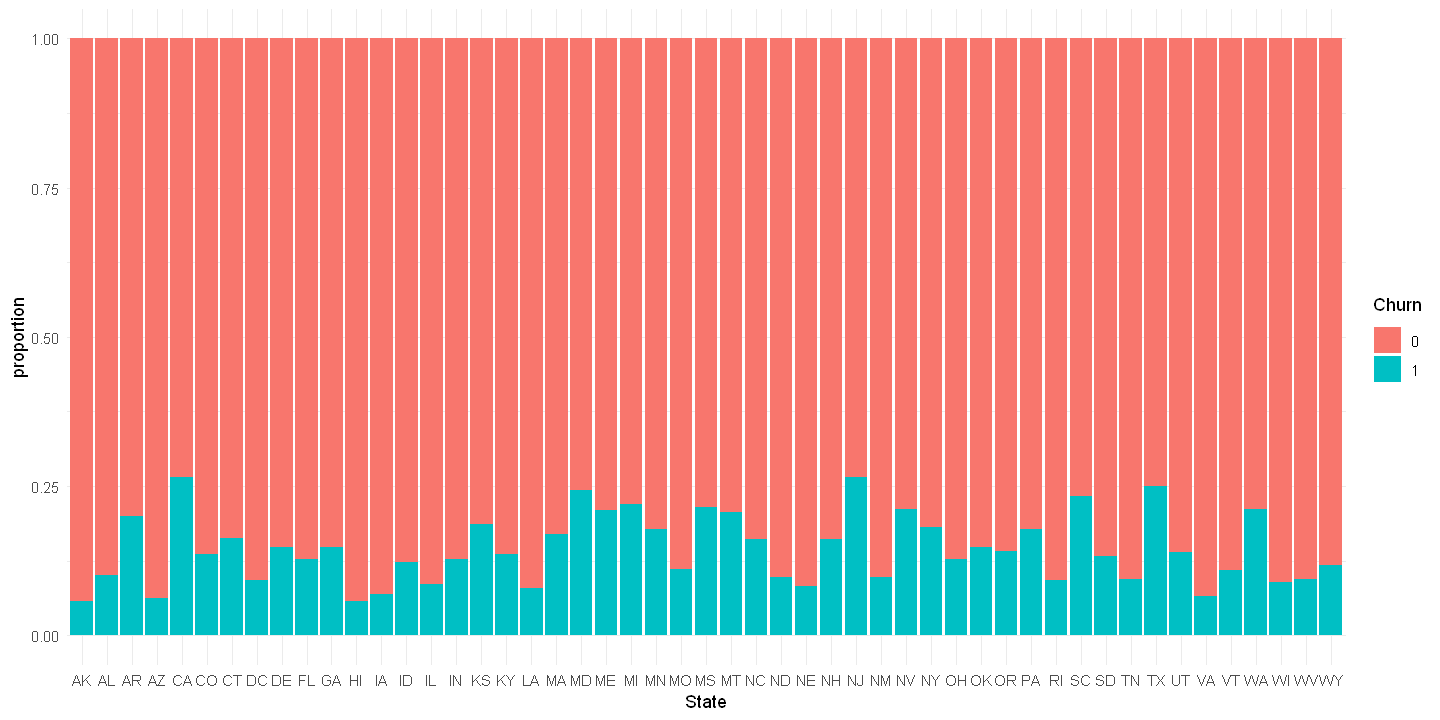

In [173]:
ggplot(churn) + 
geom_bar(aes(x = State, fill = Churn), position = 'fill') +
theme_minimal() +
labs(y = 'proportion')

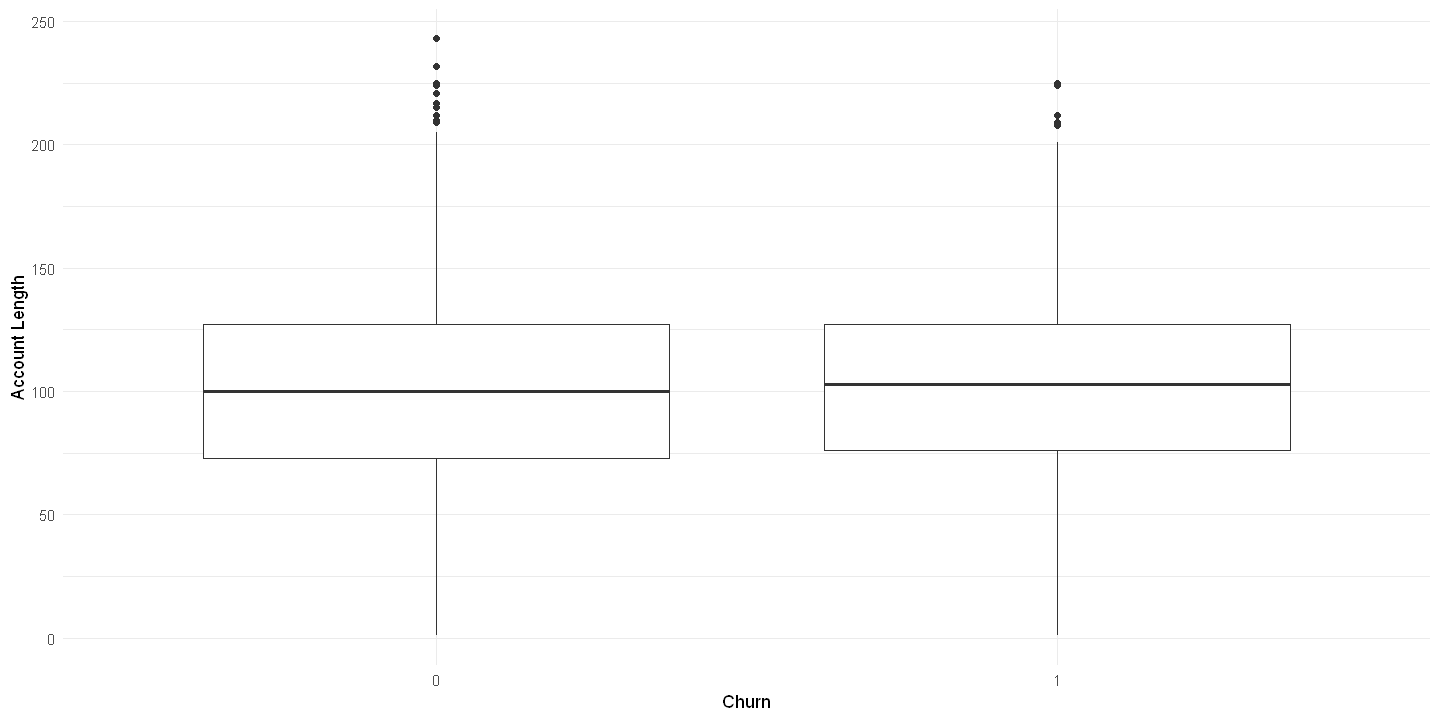

In [172]:
ggplot(churn) + 
geom_boxplot(aes(x = Churn, y = Account.Length)) +
theme_minimal() +
labs(y = 'Account Length')

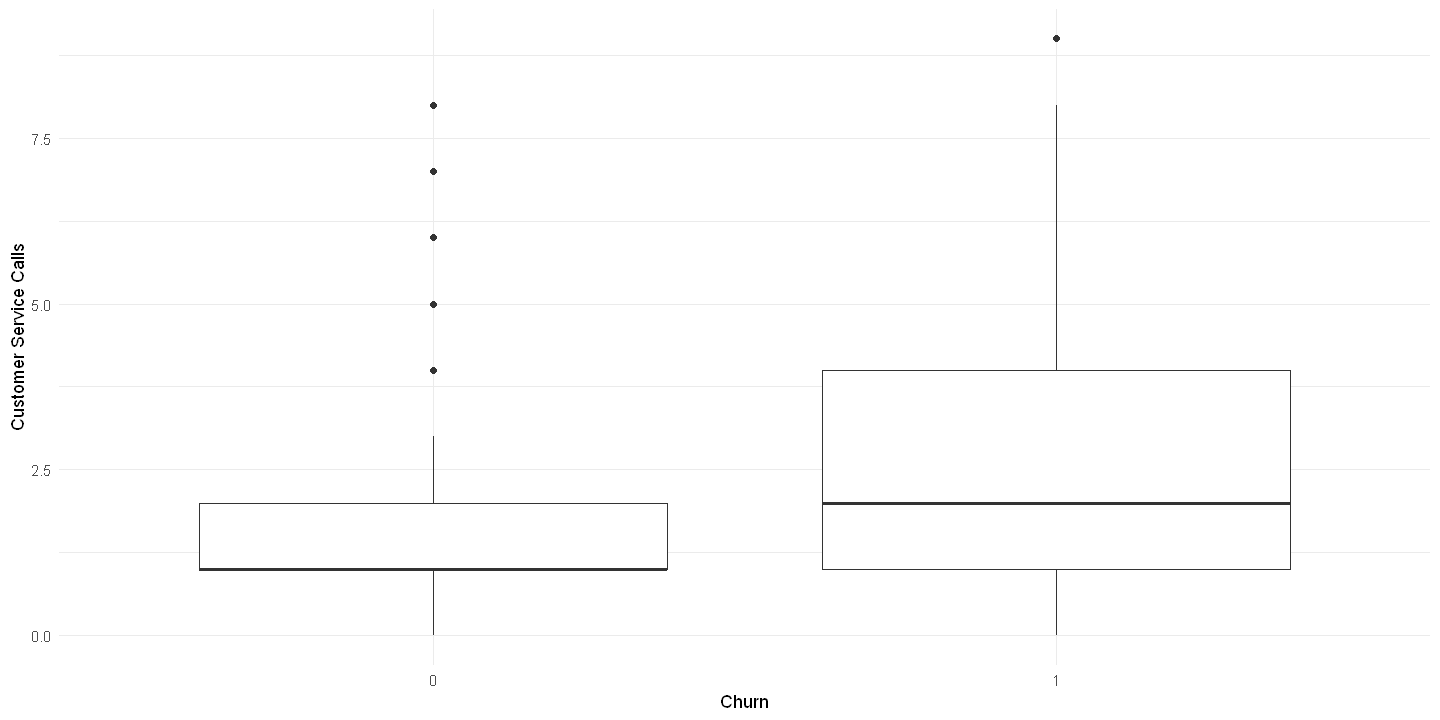

In [171]:
ggplot(churn) + 
geom_boxplot(aes(x = Churn, y = CustServ.Calls)) +
theme_minimal() +
labs(y = 'Customer Service Calls')

In [140]:
table(churn$CustServ.Calls, churn$Churn)

   
       0    1
  0  605   92
  1 1059  122
  2  672   87
  3  385   44
  4   90   76
  5   26   40
  6    8   14
  7    4    5
  8    1    1
  9    0    2

In [158]:
call_churn <- data.frame(table(churn$CustServ.Calls, churn$Churn))
names(call_churn) <- c('calls', 'churn', 'count')
str(call_churn)

'data.frame':	20 obs. of  3 variables:
 $ calls: Factor w/ 10 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ churn: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ count: int  605 1059 672 385 90 26 8 4 1 0 ...


In [159]:
call_churn$calls <- as.numeric(call_churn$calls)
str(call_churn)

'data.frame':	20 obs. of  3 variables:
 $ calls: num  1 2 3 4 5 6 7 8 9 10 ...
 $ churn: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ count: int  605 1059 672 385 90 26 8 4 1 0 ...


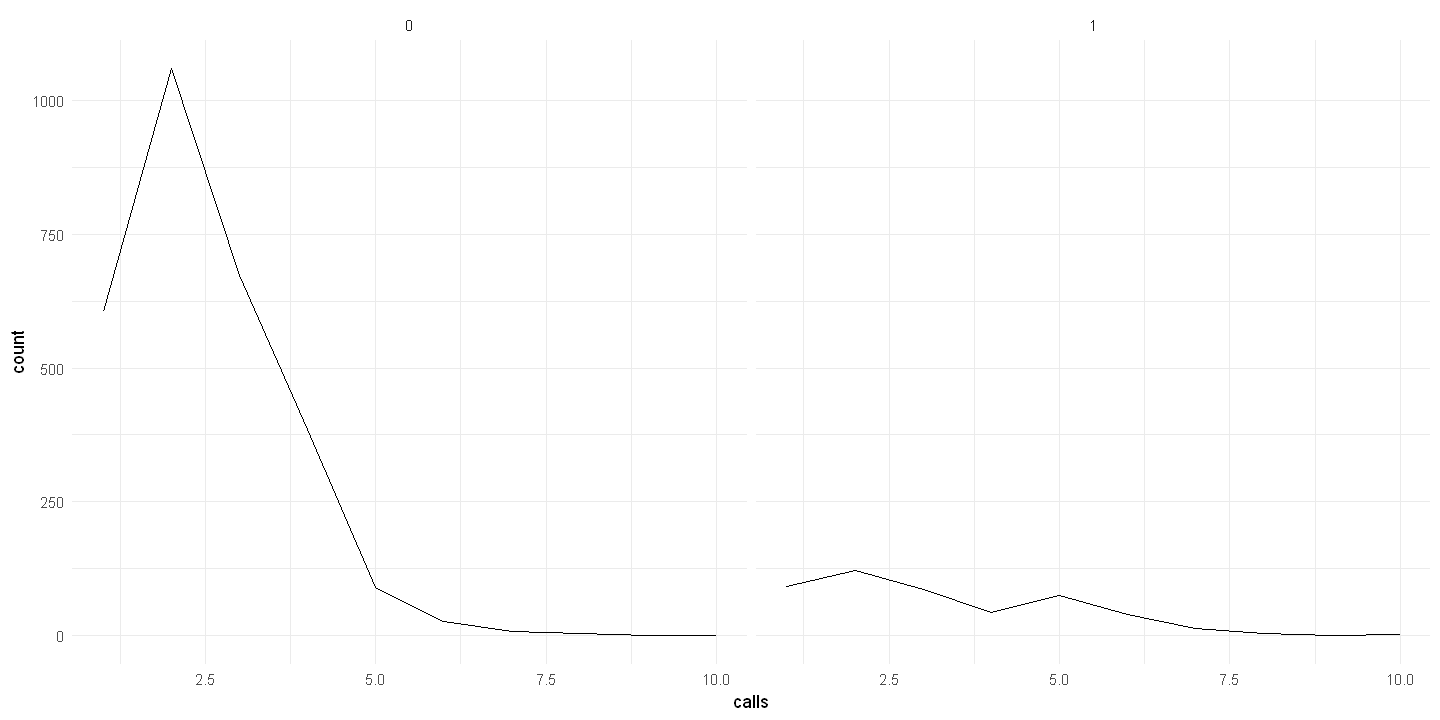

In [170]:
ggplot(call_churn) + 
geom_line(aes(x = calls, y = count)) + 
facet_wrap(~churn) +
theme_minimal()

In [198]:
churn$Phone <- NULL

Account.Length,VMail.Message,Day.Mins,Eve.Mins,Night.Mins,Intl.Mins,CustServ.Calls,Churn,Int.l.Plan,VMail.Plan,Day.Calls,Day.Charge,Eve.Calls,Eve.Charge,Night.Calls,Night.Charge,Intl.Calls,Intl.Charge,State,Area.Code
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415
107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415
137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415
84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408
75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415
118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70,AL,510


### Models

In [199]:
idx = createDataPartition(y = churn$Churn, times = 1, p = 0.7, list=FALSE)
train = churn[idx, ]
test = churn[-idx, ]

In [200]:
cv_folds <- createMultiFolds(train$Churn, k = 10, times = 3)
cv_control <- trainControl(method = "repeatedcv", number = 10,
                         repeats = 3, index = cv_folds)

In [201]:
rpart_cv_m1 <- train(Churn ~ ., data = train, method = "rpart", 
                    trControl = cv_control, tuneLength = 7)

In [223]:
varImp(rpart_cv_m1)

rpart variable importance

  only 20 most important variables shown (out of 68)

                Overall
Day.Mins       100.0000
CustServ.Calls  93.8183
Day.Charge      87.9958
Int.l.Plan      72.1664
Intl.Calls      56.7753
Eve.Mins        51.3702
Eve.Charge      48.6233
Intl.Mins       46.5565
Intl.Charge     38.9358
VMail.Plan      27.5948
VMail.Message   27.5948
Night.Mins      10.1548
Night.Charge     6.0353
Eve.Calls        2.7153
Night.Calls      1.1036
StateNJ          0.9363
StateKY          0.0000
StateNC          0.0000
StateWA          0.0000
StateMT          0.0000

In [202]:
rpart_cv_m1

CART 

2334 samples
  19 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 2100, 2102, 2100, 2101, 2100, 2101, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.01474926  0.9340209  0.7068176
  0.01769912  0.9293053  0.6833698
  0.02064897  0.9277292  0.6757355
  0.03834808  0.9261574  0.6640208
  0.05309735  0.9114556  0.5792993
  0.08259587  0.8726063  0.3051398
  0.08456244  0.8683328  0.2521813

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01474926.

In [203]:
confusionMatrix(train$Churn, predict(object = rpart_cv_m1, newdata = train))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1956   39
         1   80  259
                                          
               Accuracy : 0.949           
                 95% CI : (0.9393, 0.9576)
    No Information Rate : 0.8723          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7838          
                                          
 Mcnemar's Test P-Value : 0.0002456       
                                          
            Sensitivity : 0.9607          
            Specificity : 0.8691          
         Pos Pred Value : 0.9805          
         Neg Pred Value : 0.7640          
             Prevalence : 0.8723          
         Detection Rate : 0.8380          
   Detection Prevalence : 0.8548          
      Balanced Accuracy : 0.9149          
                                          
       'Positive' Class : 0               
                        

In [207]:
confusionMatrix(test$Churn, predict(object = rpart_cv_m1, newdata = test))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 824  31
         1  35 109
                                          
               Accuracy : 0.9339          
                 95% CI : (0.9167, 0.9485)
    No Information Rate : 0.8599          
    P-Value [Acc > NIR] : 1.045e-13       
                                          
                  Kappa : 0.7291          
                                          
 Mcnemar's Test P-Value : 0.7119          
                                          
            Sensitivity : 0.9593          
            Specificity : 0.7786          
         Pos Pred Value : 0.9637          
         Neg Pred Value : 0.7569          
             Prevalence : 0.8599          
         Detection Rate : 0.8248          
   Detection Prevalence : 0.8559          
      Balanced Accuracy : 0.8689          
                                          
       'Positive' Class : 0               
                              

In [208]:
# Precision: Of all people where we predicted churn what fraction actually is churn
# Recall: Of all people that actually are churn, what fraction did we correcyly identified as churn

cat("Precision churn: ", 109/(109+35), "\n")
cat("Recall churn: ", 109/(109+31), "\n")
cat("F-Score churn: ", 2*(109/(109+35) * 109/(109+31))/(109/(109+35) + 109/(109+31)))

Precision churn:  0.7569444 
Recall churn:  0.7785714 
F-Score churn:  0.7676056

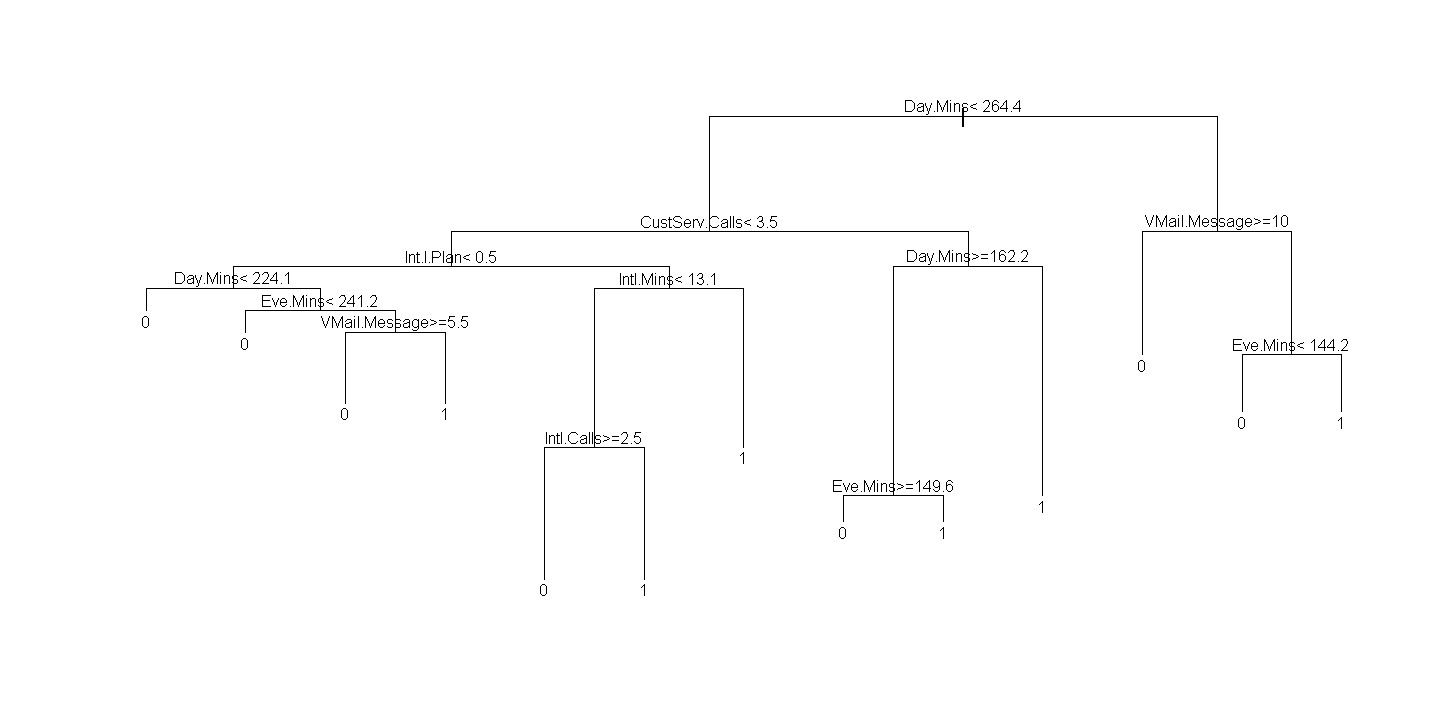

In [209]:
plot(rpart_cv_m1$finalModel)
text(rpart_cv_m1$finalModel, cex=.8)

In [219]:
modelLookup('xgbTree')

,model,parameter,label,forReg,forClass,probModel
,<chr>,<fct>,<fct>,<lgl>,<lgl>,<lgl>
1,xgbTree,nrounds,# Boosting Iterations,TRUE,TRUE,TRUE
2,xgbTree,max_depth,Max Tree Depth,TRUE,TRUE,TRUE
3,xgbTree,eta,Shrinkage,TRUE,TRUE,TRUE
4,xgbTree,gamma,Minimum Loss Reduction,TRUE,TRUE,TRUE
5,xgbTree,colsample_bytree,Subsample Ratio of Columns,TRUE,TRUE,TRUE
6,xgbTree,min_child_weight,Minimum Sum of Instance Weight,TRUE,TRUE,TRUE
7,xgbTree,subsample,Subsample Percentage,TRUE,TRUE,TRUE


In [210]:
xgboost_cv_m1 <- train(Churn ~ ., data = train, method = "xgbTree", 
                    trControl = cv_control, tuneLength = 7)

In [211]:
saveRDS(xgboost_cv_m1, "./models/xgboost_cv_m1.rds")

In [218]:
xgboost_cv_m1$bestTune

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
485,100,5,0.3,0,0.8,1,1


In [222]:
varImp(xgboost_cv_m1)

xgbTree variable importance

  only 20 most important variables shown (out of 68)

                Overall
Day.Mins       100.0000
Eve.Mins        54.4737
CustServ.Calls  50.2171
Intl.Calls      33.9814
Int.l.Plan      26.8313
Intl.Mins       26.1629
VMail.Message   22.5124
Night.Mins      21.4241
Intl.Charge     12.4353
Night.Calls     11.0824
Day.Calls       10.8587
Account.Length   9.4322
Day.Charge       9.2528
Eve.Calls        9.0126
Eve.Charge       8.1807
VMail.Plan       4.2904
Night.Charge     3.5117
Area.Code        2.2755
StateTX          1.3638
StateNJ          0.6761

In [214]:
confusionMatrix(train$Churn, predict(object = xgboost_cv_m1, newdata = train))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1995    0
         1    0  339
                                     
               Accuracy : 1          
                 95% CI : (0.9984, 1)
    No Information Rate : 0.8548     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.8548     
         Detection Rate : 0.8548     
   Detection Prevalence : 0.8548     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

In [215]:
confusionMatrix(test$Churn, predict(object = xgboost_cv_m1, newdata = test))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 840  15
         1  38 106
                                        
               Accuracy : 0.9469        
                 95% CI : (0.9312, 0.96)
    No Information Rate : 0.8789        
    P-Value [Acc > NIR] : 2.119e-13     
                                        
                  Kappa : 0.7697        
                                        
 Mcnemar's Test P-Value : 0.002512      
                                        
            Sensitivity : 0.9567        
            Specificity : 0.8760        
         Pos Pred Value : 0.9825        
         Neg Pred Value : 0.7361        
             Prevalence : 0.8789        
         Detection Rate : 0.8408        
   Detection Prevalence : 0.8559        
      Balanced Accuracy : 0.9164        
                                        
       'Positive' Class : 0             
                                        

In [216]:
# Precision: Of all people where we predicted churn what fraction actually is churn
# Recall: Of all people that actually are churn, what fraction did we correcyly identified as churn

cat("Precision churn: ", 106/(106+38), "\n")
cat("Recall churn: ", 106/(106+15), "\n")
cat("F-Score churn: ", 2*(106/(106+38) * 106/(106+15))/(106/(106+38) + 106/(106+15)))

Precision churn:  0.7361111 
Recall churn:  0.8760331 
F-Score churn:  0.8

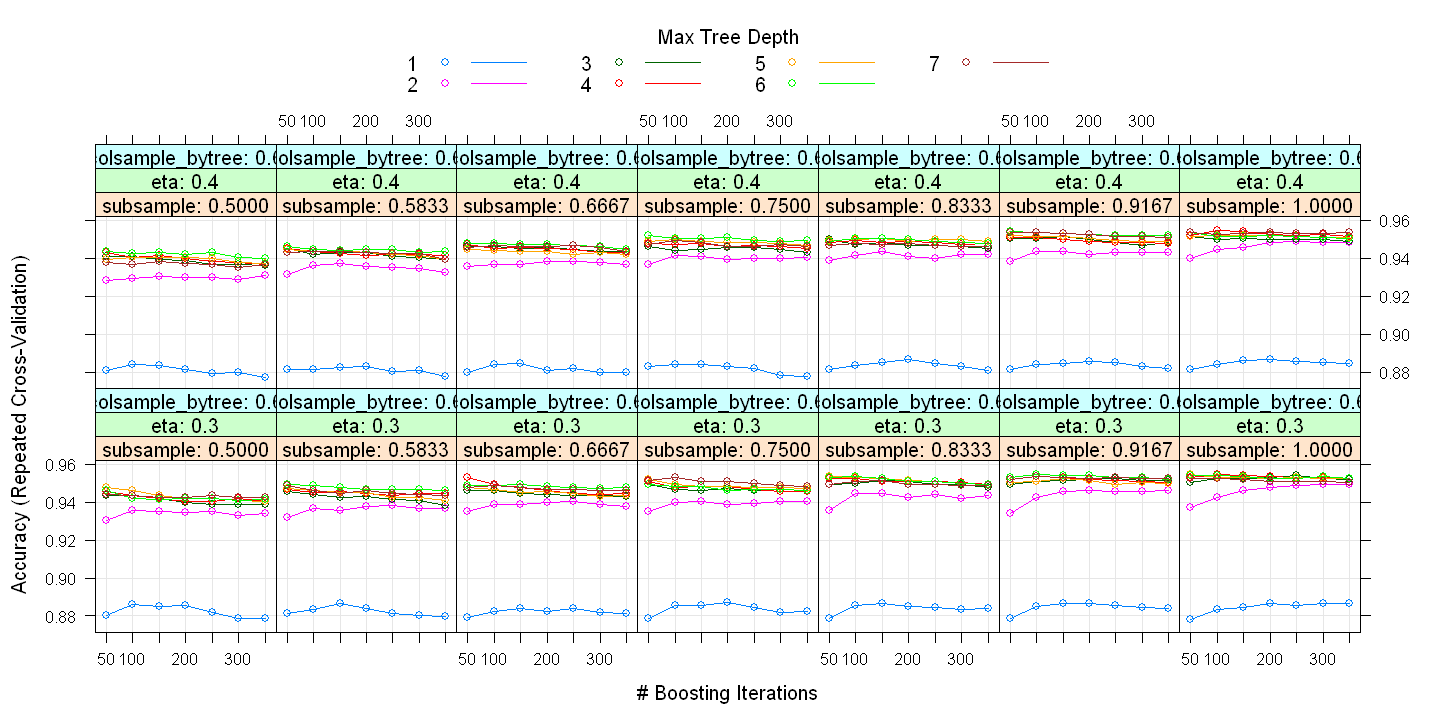

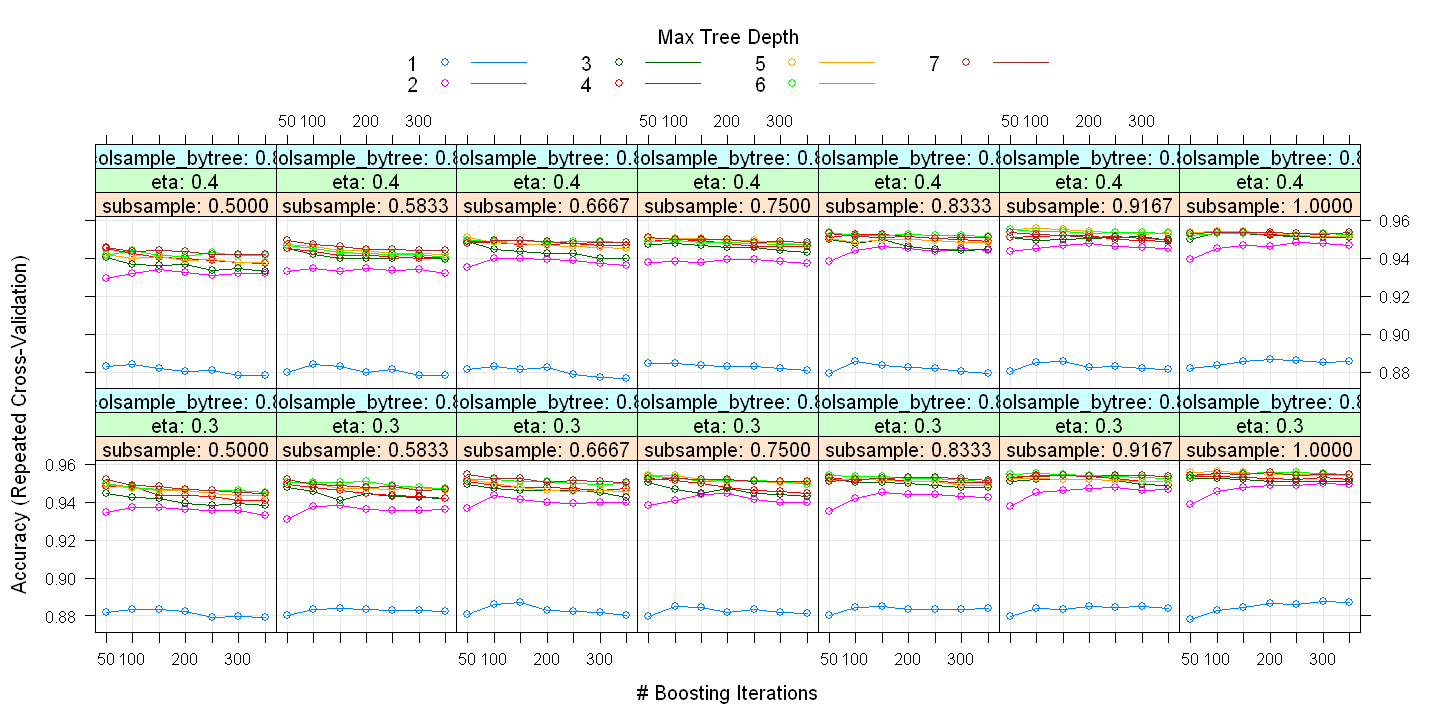

In [221]:
plot(xgboost_cv_m1) 

In [ ]:
# TODO
# try feature engineering
# transform area code to factor
# try other methods
# try cluster then predict

In [224]:
# available models in caret
names(getModelInfo())

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ordinalRF"          
[139] "ORFlog"              "ORFpls"              "ORFridge"           
[142] "ORFsvm"              "ownn"                "pam"                
[145] "parRF"               "PART"                "partDSA"            
[148] "pcaNNet"             "pcr"                 "pda"                
[151] "pda2"                "penalized"           "PenalizedLDA"       
[154] "plr"                 "pls"                 "plsRglm"            
[157] "polr"                "ppr"                 "PRIM"               
[160] "protoclass"          "qda"                 "QdaCov"             
[163] "qrf"                 "qrnn"                "randomGLM"          
[166] "ranger"              "rbf"         